# Create a grid of model systems and calculate astrophysical timescales


In [2]:
import astropy.units as u
from astropy.units import Quantity
import numpy as np
import sys
sys.path.append('/Users/clairewilliams/opt/anaconda3/lib/python3.9/site-packages')
import pandas
import matplotlib.pyplot as plt
sys.path.append('../src')

from timescales.data import build_bulk_energy_grid
from timescales import TimescaleEnsemble
from timescales.profiles.power_law import PowerLawProfile

from timescales.physics.collisions import collision_timescale
from timescales.physics.relaxation import relaxation_timescale
from timescales.physics.dynamical_friction import dynamical_friction_timescale

from timescales.analysis.tables import structural_table, timescale_table
from timescales.analysis.recipes import generate_timescale_comparison,collision_vs_main_sequence, destructive_colllision_criterion


First, create a grid of systems using the grid building function. The arrays of mass, radius, and velocity correspond to the bulk properties of the system

In [3]:
masses_array   = np.logspace(4, 8, 10) * u.Msun
radii_array    = np.logspace(-0.7, 2, 10) * u.pc
velocity_array = np.logspace(-0.7, 2.2, 10) * u.km/u.s

grid = build_bulk_energy_grid(masses_array, radii_array, velocity_array,
                              alpha=3/5, energy_unit=u.erg)


# Example: access aligned arrays
M = grid['M']   # Msun
R = grid['R']   # pc
V = grid['V']   # km/s
K = grid['K']   # erg
U = grid['U']   # erg

print(len(M), len(R), len(V), len(K), len(U))  # -> 1_000_000 each (100*100*100


167 167 167 167 167


Now, create a TimescaleEnsemble object, which will fill in the desired internal structure of each object given the bulk properties and a model for the density profile (in this case power law)

In [4]:
model1 = TimescaleEnsemble(grid, densityModel="power-law")

No profile arguments given. Defaulting to power law with alpha = 1.25
No timescale arguments given. Defaulting to eccentricity 0, Mstar 1Msun.


Visualize the structure of any object in the grid: 

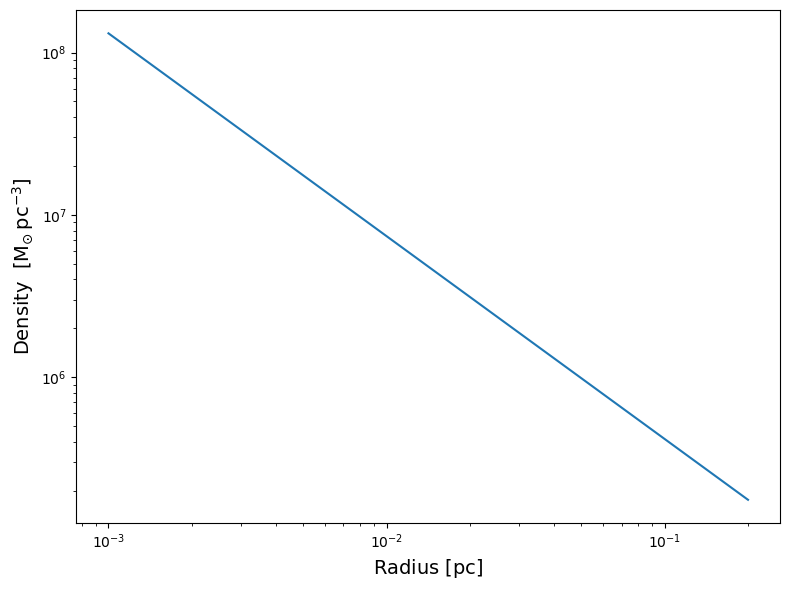

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_xscale('log')
ax.set_yscale('log')

xaxis = model1.radii[0]
yaxis = model1.rho[0]
ax.plot(xaxis,yaxis)

ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"Density  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)


plt.tight_layout()
plt.show()

Calculate an astrophysical timescale for any object in the grid: 

/Users/clairewilliams/opt/anaconda3/envs/timescales/lib/python3.9/site-packages/matplotlib/scale.py:255: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


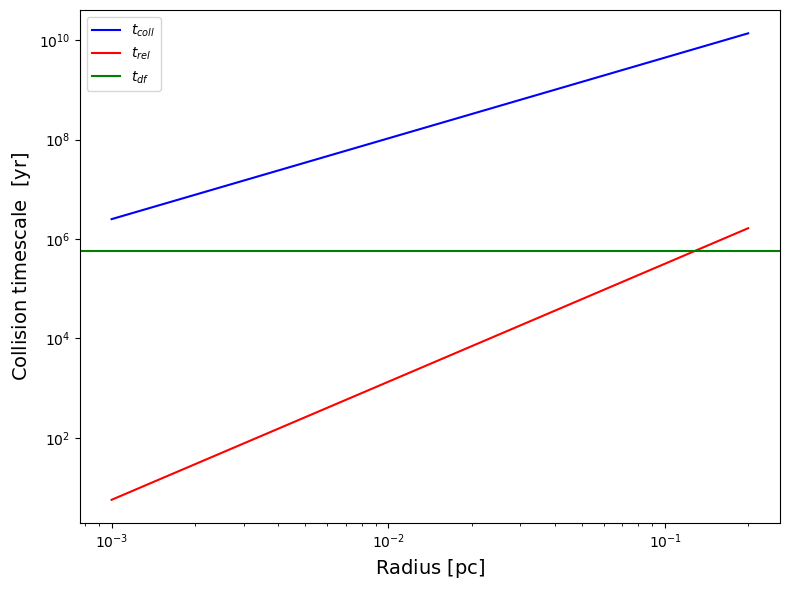

In [6]:
system_id = 0
t_coll = collision_timescale(model1.n[system_id], model1.sigma[system_id], model1.Mstar, e =0.999, alpha = 1.25).to('yr')

t_relax = relaxation_timescale(model1.sigma[system_id], model1.rho[system_id],model1.Mstar).to('yr')

t_df = dynamical_friction_timescale(model1.grid['M'][system_id],20*u.Msun,max(model1.radii[system_id]))
fig, ax = plt.subplots(figsize=(8, 6))


ax.set_xscale('log')
ax.set_yscale('log')

xaxis = model1.radii[system_id]
yaxis = t_coll
ax.plot(xaxis,yaxis, color = "blue", label = r"$t_{coll}$")
yaxis = t_relax

ax.plot(xaxis,yaxis, color = "red",label = r"$t_{rel}$")



ax.axhline(y = t_df.to('yr').value, xmin = 1e-3, xmax = 1e3, color = "green",label = r"$t_{df}$")

ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"Collision timescale  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)

plt.legend()
plt.tight_layout()
plt.show()

Or see them all

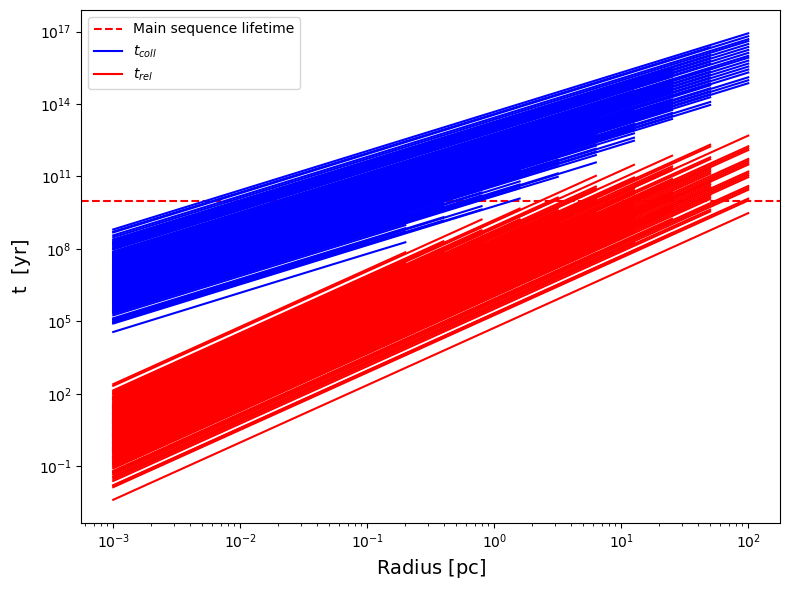

In [7]:

fig, ax = plt.subplots(figsize=(8, 6))
plt.axhline(y=1e10, color='r', linestyle='--', label='Main sequence lifetime')

ax.set_xscale('log')
ax.set_yscale('log')
system_id = 0
t_coll = collision_timescale(model1.n[system_id], model1.sigma[system_id], model1.Mstar, e =0.9, alpha = model1.alpha).to('yr')

t_relax = relaxation_timescale(model1.sigma[system_id], model1.rho[system_id],model1.Mstar).to('yr')

xaxis = model1.radii[system_id]
yaxis = t_coll
ax.plot(xaxis,yaxis, color = "blue", label = r"$t_{coll}$")
yaxis = t_relax

ax.plot(xaxis,yaxis, color = "red",label = r"$t_{rel}$")

for system_id in range(model1.Nsystems):
    t_coll = collision_timescale(model1.n[system_id], model1.sigma[system_id], model1.Mstar, e =0.9, alpha = model1.alpha).to('yr')

    t_relax = relaxation_timescale(model1.sigma[system_id], model1.rho[system_id],model1.Mstar).to('yr')

    xaxis = model1.radii[system_id]
    yaxis = t_coll
    ax.plot(xaxis,yaxis, color= "blue")
    yaxis = t_relax

    ax.plot(xaxis,yaxis, color = "red")


ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"t  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)

plt.legend()
plt.tight_layout()
plt.show()

In [10]:
model2 = TimescaleEnsemble(grid, densityModel="power-law", profile_kwargs={"alpha":1.75})

Using power-law model with properties:
alpha=1.75
No timescale arguments given. Defaulting to eccentricity 0, Mstar 1Msun.


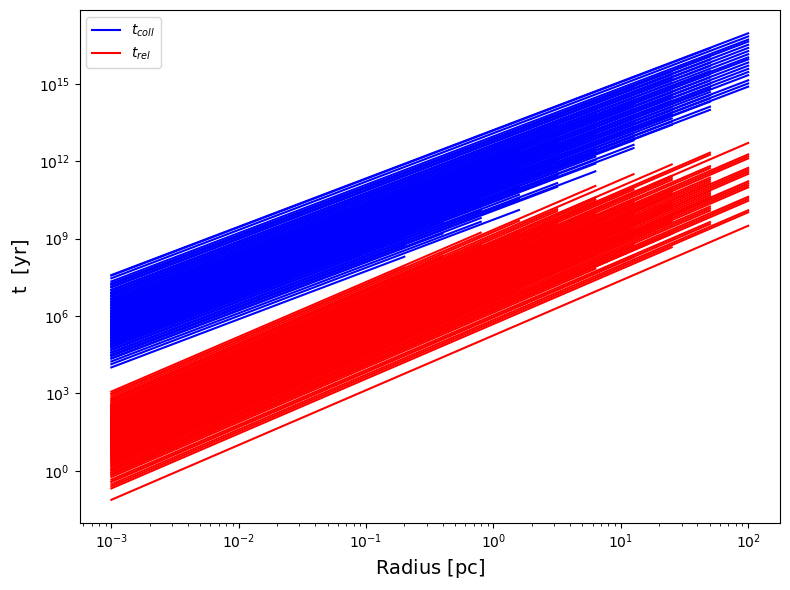

In [11]:

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_xscale('log')
ax.set_yscale('log')
system_id = 0
t_coll = collision_timescale(model2.n[system_id], model2.sigma[system_id], model2.Mstar, e =0.9, alpha = model2.alpha).to('yr')

t_relax = relaxation_timescale(model2.sigma[system_id], model2.rho[system_id],model2.Mstar).to('yr')

xaxis = model1.radii[system_id]
yaxis = t_coll
ax.plot(xaxis,yaxis, color = "blue", label = r"$t_{coll}$")
yaxis = t_relax

ax.plot(xaxis,yaxis, color = "red",label = r"$t_{rel}$")

for system_id in range(model2.Nsystems):
    t_coll = collision_timescale(model2.n[system_id], model2.sigma[system_id], model2.Mstar, e =0.9, alpha = model2.alpha).to('yr')

    t_relax = relaxation_timescale(model2.sigma[system_id], model2.rho[system_id],model2.Mstar).to('yr')

    xaxis = model2.radii[system_id]
    yaxis = t_coll
    ax.plot(xaxis,yaxis, color= "blue")
    yaxis = t_relax

    ax.plot(xaxis,yaxis, color = "red")

ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"t  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)

plt.legend()
plt.tight_layout()
plt.show()

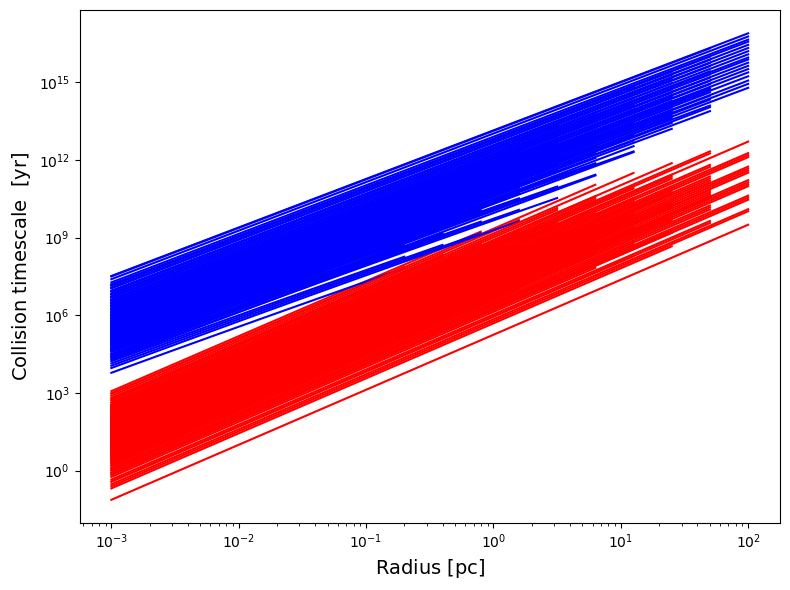

In [12]:

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_xscale('log')
ax.set_yscale('log')
for system_id in range(model2.Nsystems):
    t_coll = collision_timescale(model2.n[system_id], model2.sigma[system_id], model2.Mstar, e =0.999, alpha = model2.alpha).to('yr')

    t_relax = relaxation_timescale(model2.sigma[system_id], model2.rho[system_id],model2.Mstar).to('yr')

    xaxis = model2.radii[system_id]
    yaxis = t_coll
    ax.plot(xaxis,yaxis, color= "blue")
    yaxis = t_relax

    ax.plot(xaxis,yaxis, color = "red")

ax.set_xlabel(f"Radius [{xaxis.unit.to_string('latex_inline')}]", fontsize=14)
ax.set_ylabel(f"Collision timescale  [{yaxis.unit.to_string('latex_inline')}]", fontsize=14)


plt.tight_layout()
plt.show()

Alternatively, create a table of all timescales in all systems at all radii and compare them:

In [13]:
table5 = generate_timescale_comparison(model1, as_ = 'pandas')


will use defaults for  {'Mcollisions': <Quantity 1. solMass>, 'n_unit': <Quantity 1. 1 / cm3>, 'v_unit': Unit("cm / s"), 'Mstar_unit': Unit("solMass")}
Selected coulomb function based on BH or not.
will use defaults for  {'v_unit': Unit("km / s"), 'rho_unit': Unit("g / cm3"), 'mass_unit': Unit("solMass")}


In [14]:
table5

,system_id,r,t_coll,t_relax,sigma/vesc,massloss,t_relax/t_coll,t_ms/t_relax,t_ms/t_coll,shortest,t_ms
0,0,0.001 pc,2275439.0452130395 yr,5.666758295949817 yr,0.0012071466650133771,0.0,2.490402152442305e-06,1764677347.743465,4394.756265186503,t_relax,10000000000.0 yr
1,0,0.00132145576997553 pc,3579114.4425963387 yr,10.985875907747156 yr,0.0013401542122512286,0.0,3.069439685135592e-06,910259690.1670878,2793.9872167780873,t_relax,10000000000.0 yr
2,0,0.001746245352001619 pc,5629708.785665549 yr,21.297797286797845 yr,0.0014878169858463786,0.0,3.7831081673401336e-06,469532124.16003394,1776.290813738386,t_relax,10000000000.0 yr
3,0,0.00230758599619549 pc,8855156.336167008 yr,41.28903085002644 yr,0.0016517497487505838,0.0,4.66271054768284e-06,242195076.85522717,1129.285539449724,t_relax,10000000000.0 yr
4,0,0.0030493728293872584 pc,13928568.48193983 yr,80.04508849331565 yr,0.0018337451840191037,0.0,5.746828081945703e-06,124929588.91331695,717.9488698329824,t_relax,10000000000.0 yr
...,...,...,...,...,...,...,...,...,...,...,...
3335,166,8.858667904100823 pc,13439338089511.578 yr,5612650795.916393 yr,0.01563031178699252,0.0,0.0004176285140334893,1.7816893235680578,0.0007440842646710607,t_relax,10000000000.0 yr
3336,166,16.23776739188721 pc,35970662425527.0 yr,23668352156.035915 yr,0.01961786997523526,0.0,0.000657990444436169,0.42250512135673945,0.0002780043325780785,t_ms,10000000000.0 yr
3337,166,29.763514416313193 pc,96268432817677.95 yr,99808613461.16716 yr,0.024622722029481008,0.0,0.001036774055002993,0.1001917535292756,0.00010387621058440749,t_ms,10000000000.0 yr
3338,166,54.555947811685144 pc,257610829256026.62 yr,420889433086.2898 yr,0.03090439690478263,0.0,0.0016338188666284237,0.02375920898434583,3.8818243894791766e-05,t_ms,10000000000.0 yr
